# **Spam detection using a neural network ML model**
**Group 3:**

# Overview of the project

The main goal of this project is to use TensorFlow and Keras to train a machine-learning model, more specifically a neural network, that can identify if an email is spam or not. Such a model could be then widely used to automatically recognise and filter out unsolicited or dangerous emails.

The steps below explain how we will achieve this:

1. **Data Loading and Preparation:**

- Download the email spam classification dataset.
- Preprocess the data by mapping labels to 'spam' and 'non-spam'.
- Split the data into training, validation, and test sets (80%, 10%, 10%).
- Check whether the training dataset is balanced in terms of the number of emails labeled as spam and emails labeled as non-spam.

2. **Text Pre-processing:**

- Standardization: Convert text to lowercase and remove punctuation.
- Vectorization: Convert text into numerical representations using TextVectorization.

3. **Model Building and Training:**

- Create a sequential model with embedding, pooling, dense, and dropout layers.
- Compile the model with a binary cross-entropy loss function, an Adam optimizer, and all the metrics that will be used to evaluate the model's performance.
- Train the model on the training data and validate it using the validation set for 10 epochs to avoid overfitting.

4. **Model Evaluation:**

- Evaluate the trained model using the test dataset.
- Calculate metrics such as accuracy, precision, recall, and F1-score to assess performance.
- Check for overfitting by comparing training and test loss.

5. **Visualization:**

- Plot graphs to visualize training and validation loss and accuracy over the training epochs.


Our model and the text pre-processing procedures were inspired from the TensorFlow tutorial for basic text classification [1]. Compared to our project, the TensorFlow project performed text classification on a dataset that classified movie reviews as positive and negative.

Our other sources were mainly the lecture slides for the Introduction to Machine Learning for AI course.

# Imports

In [ ]:
# Make all the necessary imports
import docutils

import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import regex as re
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

from sklearn.model_selection import train_test_split

# Dataset loading

In [ ]:
# Download latest version of the dataset
path = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

Path to dataset files: /root/.cache/kagglehub/datasets/purusinghvi/email-spam-classification-dataset/versions/1


In [ ]:
os.listdir(path)

[]

In [ ]:
# comment the first line with os.rename after the first execution
os.rename(os.path.join(path, "combined_data.csv"), "/content/combined_data.csv")
data = pd.read_csv("/content/combined_data.csv", sep=",", header=0)

We decided to change the label "0" to "non-spam" and the label "1" to "spam" for a better understanding.

In [ ]:
data['label'] = data['label'].map({0: 'non-spam', 1: 'spam'})

Below is a quick visualization of 14 random samples of our data:

In [ ]:
data[1337:1350]

,label,text
1337,spam,"hey , come on - why not look at v i a g r a - ..."
1338,spam,it needs to connect electrically so that it sy...
1339,non-spam,"louise ,\nplease let me know if you have any q..."
1340,non-spam,on fri escapenumber apr escapenumber escapenum...
1341,non-spam,you are invited to participate in techsay com'...
1342,spam,are you bored in bed with your partner statist...
1343,spam,dear customer canadianpharmacy is one of very ...
1344,spam,- - - - 63054112933246002\ncontent - type : te...
1345,spam,inflame your passion . . . tonight !\nhttp : /...
1346,non-spam,author vlendec date escapenumber escapenumber ...


# Train/val/test split

The original dataset was split into:

*   a training dataset: 80% of the original dataset
*   a validation dataset: 10% of the original dataset (50% of the remaining dataset after extracting the training dataset)
*   a test dataset: 10% of the original dataset (50% of the remaining dataset after extracting the training dataset)

The train_test_split method from the sklear.module_selection module was used [2].

In [ ]:
texts = data['text']
labels = data['label']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

To ensure that the model will not be biased towards one class as a result of the training process, we need to check that the "spam" and "non-spam" classes are approximately balanced **in the training dataset**.

In [ ]:
total_samples = 0
spam_count = 0
non_spam_count = 0

# Iterate through the output labels in the training dataset to count them
for label in y_train:
    total_samples += 1
    if label == "spam":
        spam_count += 1
    elif label == "non-spam":
        non_spam_count += 1

# Calculate percentages
spam_percentage = (spam_count / total_samples) * 100 if total_samples > 0 else 0
non_spam_percentage = (non_spam_count / total_samples) * 100 if total_samples > 0 else 0

# Print the results
print(f"Total samples: {total_samples}")
print(f"Spam samples: {spam_count} ({spam_percentage:.2f}%)")
print(f"Non-spam samples: {non_spam_count} ({non_spam_percentage:.2f}%)")

Total samples: 66758
Spam samples: 35128 (52.62%)
Non-spam samples: 31630 (47.38%)


The percentages show that the classes are approximately balanced, with the spam class being slightly more frequent than the non-spam class.

After splitting the dataset, each of the 3 resulting datasets were put into corresponding text files, which were all contained by the directory "text_data".

In [ ]:
# Create directories for each dataset
# Comment after first execution to prevent
# the data being added to the directory again

datasets = {'train': (X_train, y_train), 'val': (X_val, y_val), 'test': (X_test, y_test)}
base_dir = "text_data"

for dataset, (texts, labels) in datasets.items():
    for text, label in zip(texts, labels):
        class_dir = os.path.join(base_dir, dataset, str(label))
        os.makedirs(class_dir, exist_ok=True)
        # Save each text sample as a file
        file_path = os.path.join(class_dir, f"{hash(text)}.txt")
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(text)

print("Data prepared in directory:", base_dir)


'\ndatasets = {\'train\': (X_train, y_train), \'val\': (X_val, y_val), \'test\': (X_test, y_test)}\nbase_dir = "text_data"\n\nfor dataset, (texts, labels) in datasets.items():\n    for text, label in zip(texts, labels):\n        class_dir = os.path.join(base_dir, dataset, str(label))\n        os.makedirs(class_dir, exist_ok=True)\n        # Save each text sample as a file\n        file_path = os.path.join(class_dir, f"{hash(text)}.txt")\n        with open(file_path, "w", encoding="utf-8") as f:\n            f.write(text)\n\nprint("Data prepared in directory:", base_dir)\n#'

Next, the text files containing each dataset need to be fed to the *tf.keras.utils.text_dataset_from_directory* method [3] to convert them into a raw format on which the standardization, vectorization, and tokenization methods can be applied. We chose the value 96 as the batch size for the datasets, and not 32 as it was set in the TensorFlow tutorial, because our dataset contained more samples.

In [ ]:
batch_size = 96
seed = 42

# Load training dataset
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    "text_data/train",
    batch_size=batch_size,
    seed=seed
)

# Load validation dataset
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    "text_data/val",
    batch_size=batch_size,
    seed=seed
)

# Load test dataset
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    "text_data/test",
    batch_size=batch_size
)


Found 66758 files belonging to 2 classes.
Found 8345 files belonging to 2 classes.
Found 8345 files belonging to 2 classes.


# Text pre-processing

The next step is the pre-processing of the text.

1) Standardization

For this step, a custom function was defined similarly to how it is defined in the TensorFlow tutorial, which transforms all letters to lowercase and replaces all non-alphabetic characters with a space. The use of the *strings.lower* and *strings.regex_replace* methods from the *tensorflow* library as well as the *escape* method from the *regex* library were used in this process.

In [ ]:
def standardization(input_data):
    # Convert the input text to lowercase
    lowercase_text = tf.strings.lower(input_data)

    # Replace HTML line breaks ('<br />') with a space
    fixed_html = tf.strings.regex_replace(lowercase_text, '<br />', ' ')

    # Remove all punctuation characters by replacing them with an empty string
    # `string.punctuation` contains common punctuation symbols
    # `re.escape` ensures that special characters are treated as literals
    return tf.strings.regex_replace(fixed_html,
                                    '[%s]' % re.escape(string.punctuation),
                                    '')

2) Vectorization

Next, we initalize a TextVectorization layer using the *layers.TextVectorization* class from *tensorflow*  [4], which maps text features to integer sequences. The specified arguments for this class instance are the following:


*   *standardize* : the custom function used to standardize the text
*   *max_tokens* : the maximum number of features in the text, set to 10000
*   *output_mode* : the type of the output, which should be an integer as each word has to be replaced by a number.
*   *output_sequence_lenght*: the dimension of the output, set to 250







Afterward, The *adapt* method of the *layers.TextVectorization* class was called on the text from the training dataset to vectorize the text.

In [ ]:
max_features = 10000
sequence_length = 250

# Prepare the text-only dataset for adaptation
train_text = raw_train_ds.map(lambda x, y: x)  # Extract only the text input

# Apply the TextVectorization layer
vectorize_layer = layers.TextVectorization(
    standardize=standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

# Adapt the vectorization layer
vectorize_layer.adapt(train_text)


NameError: name 'raw_train_ds' is not defined

A *vectorize_text* method was defined to visualize how the vectorized text looks like. The *expand_dims* method from tensorflow [5] was applied to the example text to match the number of dimensions required by the *vectorize_layer* class instance.

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# Retrieve a batch of 96 reviews and labels from the dataset
# and print one of them in its vectorized form
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

The word on each index in the vectorized text can be seen by calling the *get_vocabulary* method of the *layers.TextVectorization* class.

In [ ]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print(" 3 ---> ",vectorize_layer.get_vocabulary()[3])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

Finally, we can apply the vectorization function to the text in each dataset:

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

This is an optional step, which ensures a good CPU performance when work is done on large datasets.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model initialization

Initializing the model:
    The model is the *tf.keras.sequential* neural network, which is a classifier, composed of three main layers:
*   embedding layer - Converts input words (represented as integers) into dense vector representations of fixed size (*embedding_dim*). *max_features* defines the vocabulary size.
*   GlobalAveragePooling1D - computes the average of the embeddings across all words in the sequence and converts variable-length sequences into a fixed-length vector representation.
*   dense layer - represents a fully connected layer with a single output neuron. It uses a sigmoid activation function to produce a probability between 0 and 1.
*   the dropout layers - sets the output of 0.2 of the neurons in these layers to 0, which ensures that there is no co-adaptation between neurons.

The source code for the model class, alongside all its methods and attributes, can be found on the TensorFlow website [6]. Additionally, the details about each of the layers described above can be found on the TensorFlow website [7].



In [ ]:
embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

# Training

To train the model, the model requires a loss function, which needs to be minimized. In out case, we used the binary-cross entropy loss, which has the following formula, as specified in the lecture slides [8]:

$$
BCE = - \frac{1}{N} \sum [yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]
$$

where:
- N is the number of samples,
- yᵢ is the true label (0 or 1),
- ŷᵢ is the predicted probability (between 0 and 1).

We also used an ADAM optimizer, so that the learning rate would be adjusted during training.

Three metrics were also added: Binary accuracy, Precision, and Recall. The last two were not present in the TensorFlow tutorial. We decided to add them to ensure a robust evaluation of our model, with more than one metric. F1 was also computed manually, using the values for precision and recall.


In [ ]:
model.compile(loss = losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

Having been provided with the optimizer and loss function, the model can be trained using its *fit* method, where we specify the training and validation datasets, as well as the number of training epochs as parameters.

 In order to prevent overfitting, the training should be stopped as soon as the validation loss does not decrease anymore or starts increasing [9].

We start with 10 training epochs.



In [ ]:
epochs = 10
model_history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - binary_accuracy: 0.7350 - loss: 0.5552 - precision_2: 0.7021 - recall_2: 0.8646 - val_binary_accuracy: 0.9340 - val_loss: 0.2637 - val_precision_2: 0.9110 - val_recall_2: 0.9693
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - binary_accuracy: 0.9294 - loss: 0.2350 - precision_2: 0.8963 - recall_2: 0.9794 - val_binary_accuracy: 0.9582 - val_loss: 0.1622 - val_precision_2: 0.9454 - val_recall_2: 0.9770
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - binary_accuracy: 0.9539 - loss: 0.1547 - precision_2: 0.9338 - recall_2: 0.9822 - val_binary_accuracy: 0.9660 - val_loss: 0.1243 - val_precision_2: 0.9564 - val_recall_2: 0.9800
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - binary_accuracy: 0.9641 - loss: 0.1207 - precision_2: 0.9491 - recall_2: 0.9846 - val_binary_accuracy: 0.9714 - val_loss: 0.1033 - val_precision_2: 0.9644 - val_recall_2: 0.9818
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - binary_a

We can observe that the binary accuracy for the training dataset gradually increased from epoch to epoch, while the loss gradually decreased from epoch to epoch, indicating that the model is not underfitting the data. The same trend can be observed for the validation dataset.

Afterwards, we train it for 10 more epochs to observe how the validation loss evolves.

In [ ]:
# Uncomment this code to train the model for 10 more epochs. Below are the results obtained for the training and validation binary accuracy and loss.
"""
epochs = 10
model_history_2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)
"""

'\nepochs = 10\nmodel_history_2 = model.fit(\n    train_ds,\n    validation_data=val_ds,\n    epochs=epochs)\n'

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.9846 - loss: 0.0523 - precision: 0.9779 - recall: 0.9931 - val_binary_accuracy: 0.9814 - val_loss: 0.0620 - val_precision: 0.9738 - val_recall: 0.9913

Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.9852 - loss: 0.0480 - precision: 0.9784 - recall: 0.9938 - val_binary_accuracy: 0.9811 - val_loss: 0.0608 - val_precision: 0.9732 - val_recall: 0.9913

Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - binary_accuracy: 0.9856 - loss: 0.0453 - precision: 0.9794 - recall: 0.9935 - val_binary_accuracy: 0.9821 - val_loss: 0.0597 - val_precision: 0.9747 - val_recall: 0.9918

Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.9867 - loss: 0.0426 - precision: 0.9809 - recall: 0.9941 - val_binary_accuracy: 0.9824 - val_loss: 0.0595 - val_precision: 0.9745 - val_recall: 0.9925

Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - binary_accuracy: 0.9871 - loss: 0.0401 - precision: 0.9815 - recall: 0.9943 - val_binary_accuracy: 0.9832 - val_loss: 0.0577 - val_precision: 0.9769 - val_recall: 0.9916

Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - binary_accuracy: 0.9880 - loss: 0.0376 - precision: 0.9827 - recall: 0.9947 - val_binary_accuracy: 0.9839 - val_loss: 0.0566 - val_precision: 0.9789 - val_recall: 0.9909

Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.9886 - loss: 0.0355 - precision: 0.9837 - recall: 0.9948 - val_binary_accuracy: 0.9832 - val_loss: 0.0580 - val_precision: 0.9762 - val_recall: 0.9923

Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.9891 - loss: 0.0340 - precision: 0.9846 - recall: 0.9949 - val_binary_accuracy: 0.9838 - val_loss: 0.0562 - val_precision: 0.9784 - val_recall: 0.9911

Epoch 9/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.9891 - loss: 0.0326 - precision: 0.9848 - recall: 0.9947 - val_binary_accuracy: 0.9837 - val_loss: 0.0565 - val_precision: 0.9780 - val_recall: 0.9913

Epoch 10/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - binary_accuracy: 0.9899 - loss: 0.0308 - precision: 0.9855 - recall: 0.9955 - val_binary_accuracy: 0.9853 - val_loss: 0.0560 - val_precision: 0.9806 - val_recall: 0.9916

As can be observed, from the 15th epoch onward, the validation loss does not significantly decrease anymore and starts oscillating around the same range: 0.055 - 0.057. Thus, 10 epochs can be considered enough to train the neural network.


# Overfitting check

The model has been trained on the training and validation datasets using the fit method for an appropriate number of epochs, and is ready to be evaluated on the test dataset. Its proper implementation can be verified through a comparison between the values for binary accuracy and loss obtained on the training dataset and the same values obtained on the test dataset. These values are the first two values returned by the *evaluate* method of the model.

In [ ]:
loss_training_dataset, accuracy_training_dataset = model.evaluate(train_ds)[0:2]
loss_test_dataset, accuracy_test_dataset = model.evaluate(test_ds)[0:2]

print("Loss_test_dataset: ", loss_test_dataset)
print("Accuracy_test_dataset: ", accuracy_test_dataset)

696/696 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - binary_accuracy: 0.9924 - loss: 0.0274 - precision_2: 0.9904 - recall_2: 0.9953
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9854 - loss: 0.0578 - precision_2: 0.9876 - recall_2: 0.9851
Loss_test_dataset:  0.04832402989268303
Accuracy_test_dataset:  0.9877771139144897


If our model was overfitting, the absolute difference between the binary loss on the training dataset and the one on the test dataset would be quite high [8]. That is not the case, however, as can be observed from the very low value of the difference:



In [ ]:
absolute_loss_gap = abs(loss_training_dataset - loss_test_dataset)
print("Absolute loss gap: ", absolute_loss_gap)

Absolute loss gap:  0.021920818835496902


# Evaluation metrics

Given that the dataset is not imbalanced, the binary accuracy can be considered a good metric for this model [10]. Nonetheless, its value can still be compared to other classification metrics, such as precision, recall, or F1. All the formulas were taken from the lecture slides [10].

The formula for the binary accuracy is:

$$
\text{Binary Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

where:
- **TP** = True Positives (correctly predicted as spam)
- **TN** = True Negatives (correctly predicted as non-spam)
- **FP** = False Positives (incorrectly predicted as spam)
- **FN** = False Negatives (incorrectly predicted as non-spam)

The formula for precision is:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

\\
The formula for recall is:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$


The formula for the F1 score is:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [ ]:
accuracy_test_dataset, precision_test_dataset, recall_test_dataset = model.evaluate(test_ds)[1:] # the first element is the loss and can be skipped
# compute F1 manually using the formula
F1_test_dataset = 2 * (precision_test_dataset * recall_test_dataset) / (precision_test_dataset + recall_test_dataset)

print("Accuracy: ", accuracy_test_dataset)
print("Precision: ", precision_test_dataset)
print("Recall: ", recall_test_dataset)
print("F1_score: ", F1_test_dataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9854 - loss: 0.0578 - precision_2: 0.9876 - recall_2: 0.9851
Accuracy:  0.9877771139144897
Precision:  0.9881629943847656
Recall:  0.9886130690574646
F1_score:  0.9883879804843527


# Graphs

The results from the training can also be visualized by plotting the training and validation loss and accuracy over the 10 training epochs.

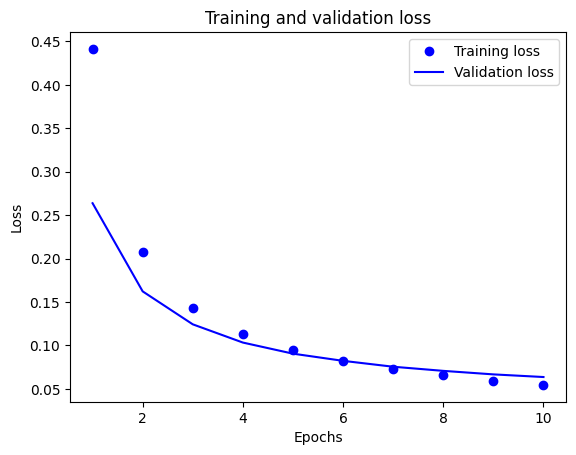

In [ ]:
history_dict = model_history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

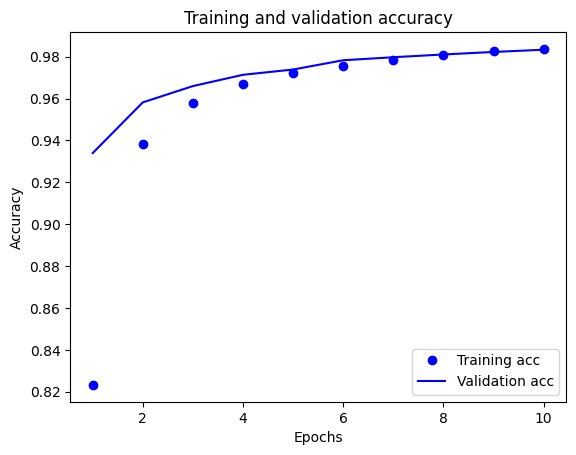

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

From the graphs too, it can be observed that the training and validation accuracy and losses evolve in the same manner across the epoch. The validation loss also does not increase. These are an indicator that overfitting does not occur.

# Conclusions
- Both the training and validation accuracy increase and the loss decrease over the 10 training epochs, indicating that the model is trained properly and does not overfit during training and the model works as intended.
- The training accuracy increases significantly from the first epoch to the second. This could be explained by the high number of training samples (N = 66758 samples), which, together with the complex vectorization methods and neural network, ensure a quite fast learning process.
- The accuracy on the testing dataset has a high value, very similar to the one obtained on the training dataset, which indicates that the model successfully learned the binary text classification task of labeling emails as spam or non-spam.
- The fact that the model was successfully trained both on the movie reveiw classification in the TensorFlow tutorial [1] and spam detection tasks indicates that the model is generalizable to multiple tasks. Furthermore, it indicates that the text pre-processing techniques can be universally used no matter whehter the task is to label movie reviews positive or negative or to classify emails as spam or non-spam.

# References

- [1] Basic Text Classification | TensorFlow https://www.tensorflow.org/tutorials/keras/text_classification
- [2] train_test_split. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- [3] tf.keras.preprocessing.text_dataset_from_directory  |  TensorFlow v2.16.1. (2025). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text_dataset_from_directory
- [4] tf.keras.layers.TextVectorization | TensorFlow Core v2.7.0. (n.d.). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization
- [5] tf.expand_dims  |  TensorFlow v2.16.1. (2025). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/expand_dims
- [6] tf.keras.Sequential | TensorFlow Core v2.3.0. (n.d.). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- [7] tf.keras.layers | TensorFlow v2.16.1 (n.d.). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/layers
- [8] Lecture 6 slides. Introduction to ML for AI. University of Groningen (2024-2025)
- [9] Lecture 6 slides. Introduction to ML for AI. University of Groningen (2024-2025)
- [10] Lecture 5 slides. Introduction to ML for AI. University of Groningen (2024-2025)

